In [1]:
"""
Consolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)
"""

'\nConsolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)\n'

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

# Load DFallPa dataset

In [ ]:

# this is the path to the dataset
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-230615-trial-kilosort_if_exists-norm=None-combine=True.pkl"
DFallpa = pd.read_pickle(path)


In [ ]:
pa = DFallpa["pa"].values[0]
dflab = pa.Xlabels["trials"]
dflab["taskconfig_shploc_SHSEM"].value_counts()
#  'taskconfig_loc',
#  'taskconfig_shp',
#  'taskconfig_shp_SHSEM',
#  'taskconfig_shploc',
#  'taskconfig_shploc_SHSEM',


In [ ]:
##### Method: loading functrion"

In [3]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [4]:
# Method 1 - load a single DFallPA
DFallpa = load_handsaved_wrapper()


# Quick look at DFallpa

In [5]:
# This holds data across multiple brain regions (the "bregion" column)
# -- "event", the event during trial which this data is aligned to
# -- "twind", time extracted aligned to that event, in seconds
# -- pa, PopAnal class holding neurla data and behavioral features.
# -- pa_x_shape, shape of neural data, in (chans, trials, times)
# Ingore the "which_level"

display(DFallpa)


which_level              event bregion        twind  \
0        trial            03_samp      M1  (-0.8, 1.2)   
1        trial            03_samp     PMv  (-0.8, 1.2)   
2        trial            03_samp     PMd  (-0.8, 1.2)   
3        trial            03_samp   dlPFC  (-0.8, 1.2)   
4        trial            03_samp   vlPFC  (-0.8, 1.2)   
5        trial            03_samp      FP  (-0.8, 1.2)   
6        trial            03_samp     SMA  (-0.8, 1.2)   
7        trial            03_samp  preSMA  (-0.8, 1.2)   
8        trial     05_first_raise      M1  (-0.8, 1.2)   
9        trial     05_first_raise     PMv  (-0.8, 1.2)   
10       trial     05_first_raise     PMd  (-0.8, 1.2)   
11       trial     05_first_raise   dlPFC  (-0.8, 1.2)   
12       trial     05_first_raise   vlPFC  (-0.8, 1.2)   
13       trial     05_first_raise      FP  (-0.8, 1.2)   
14       trial     05_first_raise     SMA  (-0.8, 1.2)   
15       trial     05_first_raise  preSMA  (-0.8, 1.2)   
16       trial  06_on_strokeidx_0      M1  (-0.8, 1.2)   
17       trial  06_on_strokeidx_0     PMv  (-0.8, 1.2)   
18       trial  06_on_strokeidx_0     PMd  (-0.8, 1.2)   
19       trial  06_on_strokeidx_0   dlPFC  (-0.8, 1.2)   
20       trial  06_on_strokeidx_0   vlPFC  (-0.8, 1.2)   
21       trial  06_on_strokeidx_0      FP  (-0.8, 1.2)   
22       trial  06_on_strokeidx_0     SMA  (-0.8, 1.2)   
23       trial  06_on_strokeidx_0  preSMA  (-0.8, 1.2)   

                                                   pa      pa_x_shape  
0   <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 200)  
1   <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 200)  
2   <neuralmonkey.classes.population.PopAnal objec...  (36, 425, 200)  
3   <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 200)  
4   <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 200)  
5   <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 200)  
6   <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 200)  
7   <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 200)  
8   <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 200)  
9   <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 200)  
10  <neuralmonkey.classes.population.PopAnal objec...  (36, 425, 200)  
11  <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 200)  
12  <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 200)  
13  <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 200)  
14  <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 200)  
15  <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 200)  
16  <neuralmonkey.classes.population.PopAnal objec...  (46, 425, 200)  
17  <neuralmonkey.classes.population.PopAnal objec...  (70, 425, 200)  
18  <neuralmonkey.classes.population.PopAnal objec...  (36, 425, 200)  
19  <neuralmonkey.classes.population.PopAnal objec...  (23, 425, 200)  
20  <neuralmonkey.classes.population.PopAnal objec...  (54, 425, 200)  
21  <neuralmonkey.classes.population.PopAnal objec...  (35, 425, 200)  
22  <neuralmonkey.classes.population.PopAnal objec...  (53, 425, 200)  
23  <neuralmonkey.classes.population.PopAnal objec...  (68, 425, 200)

In [6]:
# Pull out a single pa
pa = DFallpa["pa"].values[17]


In [7]:
# This holds data for a single brain area
# The main data is here, in pa.X, an array with dimensions (channels, trials, timepoints)
print(pa.X.shape)

# The labels for channels, trials, and times:
print("channels: ", pa.Chans)
print("trials: ", pa.Trials)
print("timepoints: ", pa.Times)




(70, 425, 200)
channels:  [1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1127, 1128, 1129, 1130, 1428, 1430]
trials:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130

In [8]:
# Each trials has associated "features", saved here, where each row of this dataframe matches a trial
pa.Xlabels["trials"]


seqc_5_shapesemcat  seqc_1_locy seqc_0_loc  seqc_3_locx  seqc_0_angle  \
0                  IGN          NaN     (0, 1)          NaN      6.213264   
1                  IGN          NaN     (1, 0)          NaN      2.867349   
2                  IGN          NaN     (0, 0)          NaN      5.876927   
3                  IGN          NaN     (1, 1)          NaN      3.172190   
4                  IGN          NaN     (1, 0)          NaN      3.364891   
..                 ...          ...        ...          ...           ...   
420                IGN          NaN     (0, 0)          NaN      1.650812   
421                IGN          NaN     (1, 1)          NaN      4.673334   
422                IGN          NaN     (1, 0)          NaN      0.776192   
423                IGN          NaN     (0, 0)          NaN      4.262700   
424                IGN          NaN     (1, 0)          NaN      3.508991   

    shape_semantic_labels                                             Tktask  \
0       [Lcentered-UL-UL]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
1               [V-RR-RR]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
2       [Lcentered-UL-UL]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
3               [V-RR-RR]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
4          [circle-XX-XX]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
..                    ...                                                ...   
420       [arcdeep-DD-DD]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
421     [zigzagSq-LL-0.0]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
422       [arcdeep-DD-DD]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
423        [circle-XX-XX]  <pythonlib.drawmodel.tokens.Tokens object at 0...   
424        [circle-XX-XX]  <pythonlib.drawmodel.tokens.Tokens object at 0...   

    supervision_stage_concise shape_is_novel_list seqc_0_center_binned  ...  \
0               off|0||1111|0            (False,)               (1, 3)  ...   
1               off|0||1111|0            (False,)               (3, 1)  ...   
2               off|0||1111|0            (False,)               (1, 1)  ...   
3               off|0||1111|0            (False,)               (3, 3)  ...   
4               off|0||1111|0            (False,)               (3, 1)  ...   
..                        ...                 ...                  ...  ...   
420             off|0||1111|0            (False,)               (1, 1)  ...   
421             off|0||1111|0            (False,)               (3, 3)  ...   
422             off|0||1111|0            (False,)               (3, 1)  ...   
423             off|0||1111|0            (False,)               (1, 1)  ...   
424             off|0||1111|0            (False,)               (3, 1)  ...   

    taskconfig_shp_SHSEM       taskconfig_shploc_SHSEM seqc_2_angle  \
0     (Lcentered-UL-UL,)  ((Lcentered-UL-UL, (0, 1)),)          NaN   
1             (V-RR-RR,)          ((V-RR-RR, (1, 0)),)          NaN   
2     (Lcentered-UL-UL,)  ((Lcentered-UL-UL, (0, 0)),)          NaN   
3             (V-RR-RR,)          ((V-RR-RR, (1, 1)),)          NaN   
4        (circle-XX-XX,)     ((circle-XX-XX, (1, 0)),)          NaN   
..                   ...                           ...          ...   
420     (arcdeep-DD-DD,)    ((arcdeep-DD-DD, (0, 0)),)          NaN   
421   (zigzagSq-LL-0.0,)  ((zigzagSq-LL-0.0, (1, 1)),)          NaN   
422     (arcdeep-DD-DD,)    ((arcdeep-DD-DD, (1, 0)),)          NaN   
423      (circle-XX-XX,)     ((circle-XX-XX, (0, 0)),)          NaN   
424      (circle-XX-XX,)     ((circle-XX-XX, (1, 0)),)          NaN   

       index_datapt seqc_4_center_binned  shape_is_novel_all which_level  \
0     (230615-2-1,)           (IGN, IGN)               False       trial   
1    (230615-2-10,)           (IGN, IGN)               False       trial   
2    (230615-2-11,)           (IGN, IGN)               False       trial   
3    (230615

In [10]:
# e.g., to get the features for trial i, do this
trial = 10
features = pa.Xlabels["trials"].iloc[trial]
display(features)

seqc_5_shapesemcat                  IGN
seqc_1_locy                         NaN
seqc_0_loc                       (0, 1)
seqc_3_locx                         NaN
seqc_0_angle                   3.205665
                            ...        
shape_is_novel_all                False
which_level                       trial
event                 06_on_strokeidx_0
bregion                             PMv
twind                       (-0.8, 1.2)
Name: 10, Length: 117, dtype: object

# Preprocess methods

### (1a) FR normalization

##### Method 1 - each PA normalize independently

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

### (1b) FR normalization, apply across events


In [ ]:

# Prune to chans that are common across pa for each bregion (intersection of chans)|
dfpa_match_chans_across_pa_each_bregion(DFallpa)


##### Method 2 - Concat events (for each bregion) and normalize all same way


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
dfpa_concat_normalize_fr_split_multbregion(DFallpa)


##### Method 3 - concat events (flexible version, only constrianed to have same n chans across PA)

Running ..  M1
Running ..  PMv
Running ..  PMd
Running ..  dlPFC
Running ..  vlPFC
Running ..  FP
Running ..  SMA
Running ..  preSMA


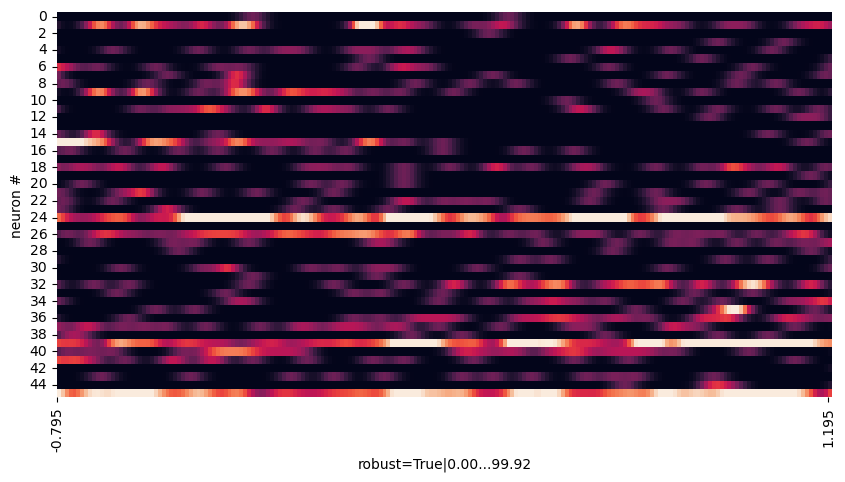

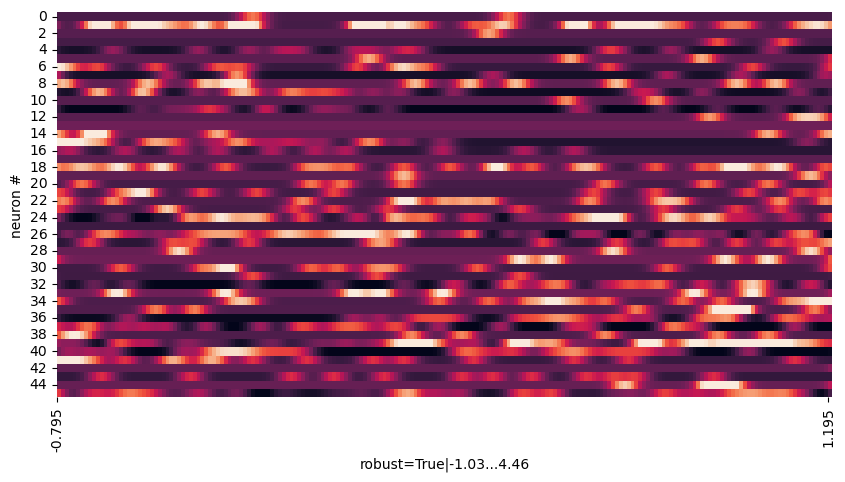

In [11]:
from neuralmonkey.classes.population_mult import dfpa_concat_normalize_fr_split_multbregion_flex
fr_mean_subtract_method = "across_time_bins"
# fr_mean_subtract_method = "each_time_bin"
PLOT=False

pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)

dfpa_concat_normalize_fr_split_multbregion_flex(DFallpa, fr_mean_subtract_method, PLOT)

pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)

### PCA

### Run for a single event

##### (1) PCA using trial data

In [12]:
bregion = "PMv"
event="06_on_strokeidx_0"
PA = extract_single_pa(DFallpa, bregion, None, event=event)

In [13]:
tbin_dur = 0.1
tbin_slide = 0.01
npcs_keep_force = 15
if True:
    # To plot things for each pc run
    plot_pca_explained_var_path = f"/tmp/plot_pca_explained_var_path-{bregion}.pdf"
    plot_loadings_path = f"/tmp/plot_loadings_path-{bregion}.pdf"
else:
    plot_pca_explained_var_path = None
    plot_loadings_path = None
norm_subtract_single_mean_each_chan = True
_, PAfinal1, _, _, _ = PA.dataextract_state_space_decode_flex(None, tbin_dur, tbin_slide, 
                                                        "chans_x_trials_x_times",
                                                        pca_reduce=True,
                                                        plot_pca_explained_var_path=plot_pca_explained_var_path, 
                                                        plot_loadings_path=plot_loadings_path,
                                                        norm_subtract_single_mean_each_chan=norm_subtract_single_mean_each_chan,
                                                        npcs_keep_force=npcs_keep_force)
plt.close("all")


Doing PCA


##### (2) PCA on trial-averaged data

In [14]:
import os

Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


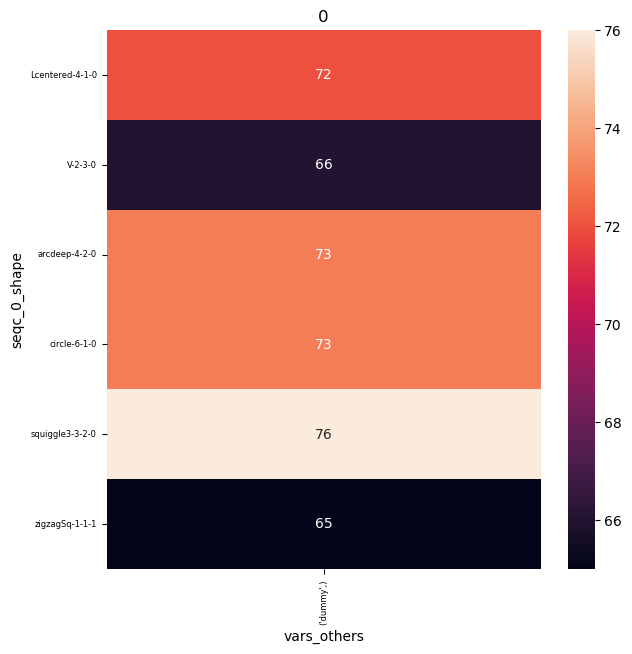

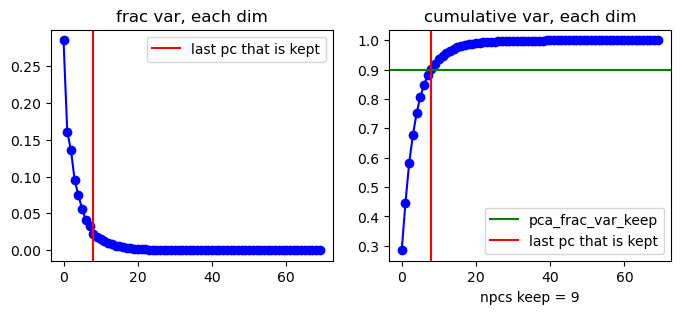

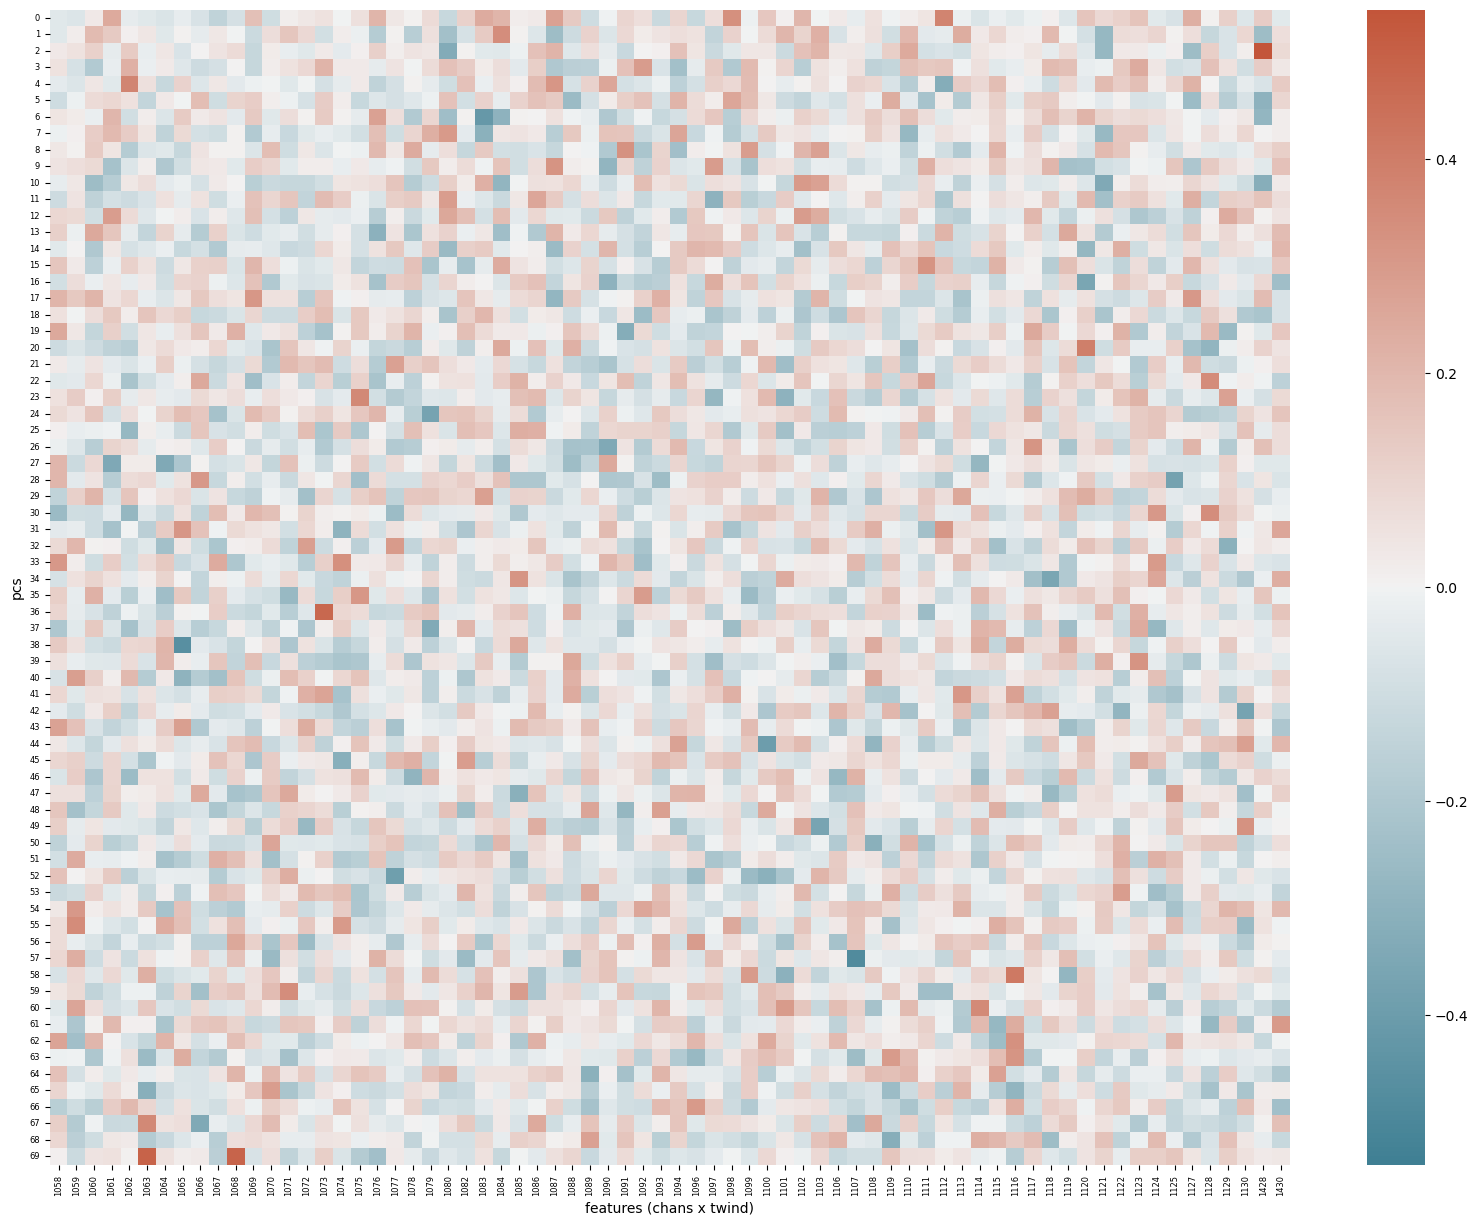

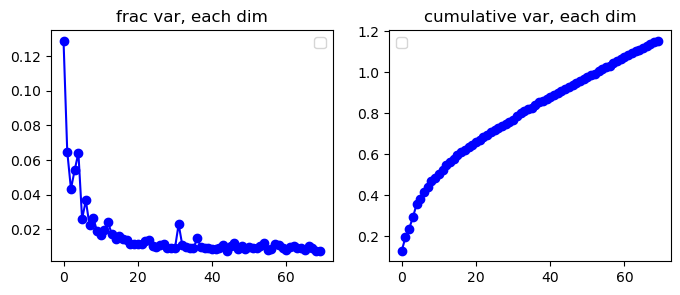

In [15]:
savedir_plots = f"/tmp/pca_plots"
os.makedirs(savedir_plots, exist_ok=True)

var_pca = "seqc_0_shape"
vars_grouping = None
n_pcs_subspace_max = 15

# Fixed params
raw_subtract_mean_each_timepoint = False
pca_subtract_mean_each_level_grouping = True
n_min_per_lev_lev_others = 5
prune_min_n_levs = 2

# PCA time window -- use specific smaller window for fitting PC
pca_twind = (0.1, 1.0)
pca_tbindur = 0.1
pca_tbin_slice = 0.01

# Data projection time window -- keep larger window for data
proj_twind = (-0.5, 1.0)
proj_tbindur = 0.1
proj_tbin_slice = 0.01

Xredu, PAfinal2, stats_redu, Xfinal_before_redu, pca, PAraw = PA.dataextract_pca_demixed_subspace(var_pca, vars_grouping,
                                                pca_twind, pca_tbindur,
                                                savedir_plots=savedir_plots,
                                                raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                                pca_subtract_mean_each_level_grouping=pca_subtract_mean_each_level_grouping,
                                                n_min_per_lev_lev_others=n_min_per_lev_lev_others, prune_min_n_levs = prune_min_n_levs,
                                                n_pcs_subspace_max = n_pcs_subspace_max,
                                                do_pca_after_project_on_subspace=False,
                                                PLOT_STEPS=False, SANITY=False,
                                                reshape_method="chans_x_trials_x_times",
                                                pca_tbin_slice=pca_tbin_slice, return_raw_data=True,
                                                proj_twind = proj_twind, proj_tbindur = proj_tbindur, 
                                                proj_tbin_slice = proj_tbin_slice)



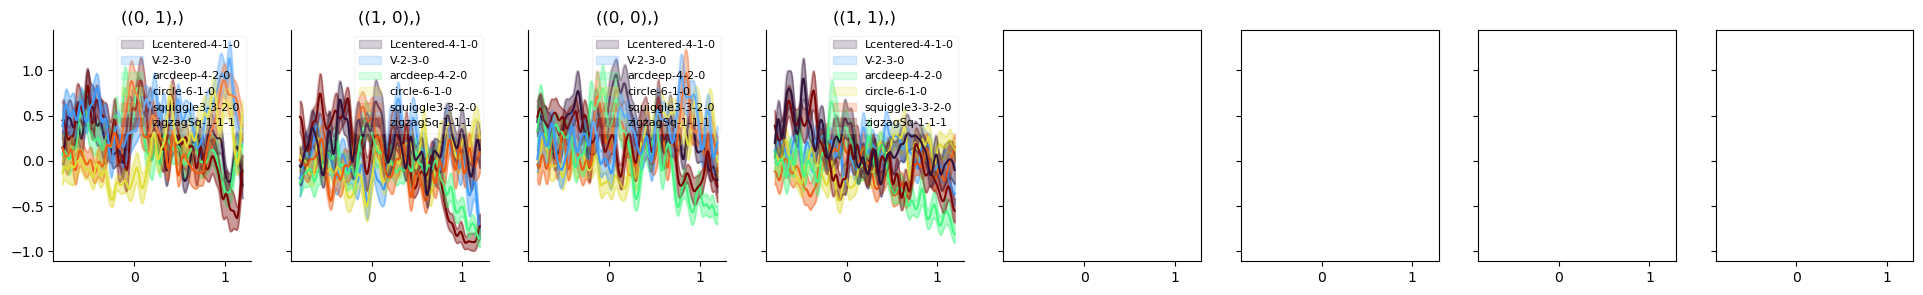

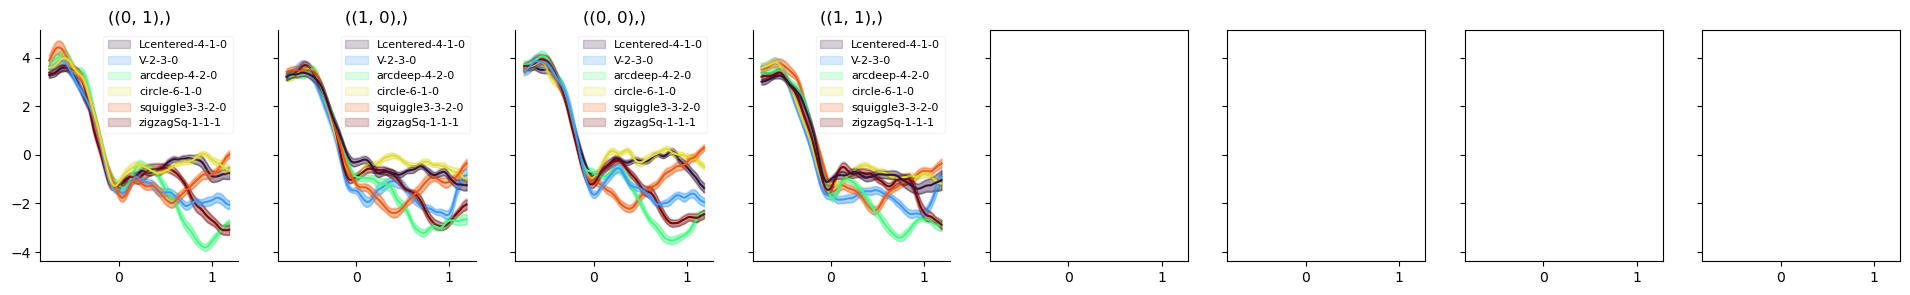

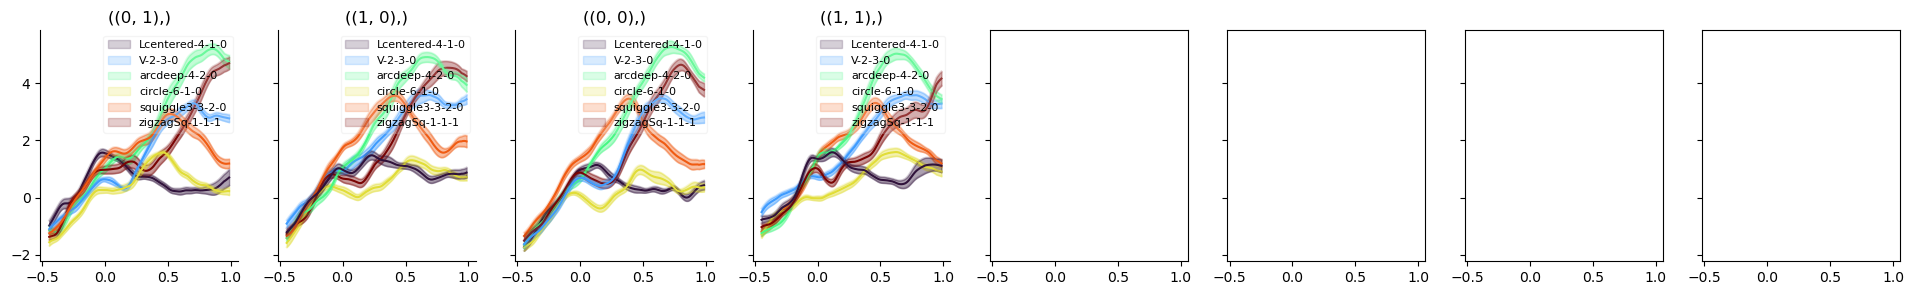

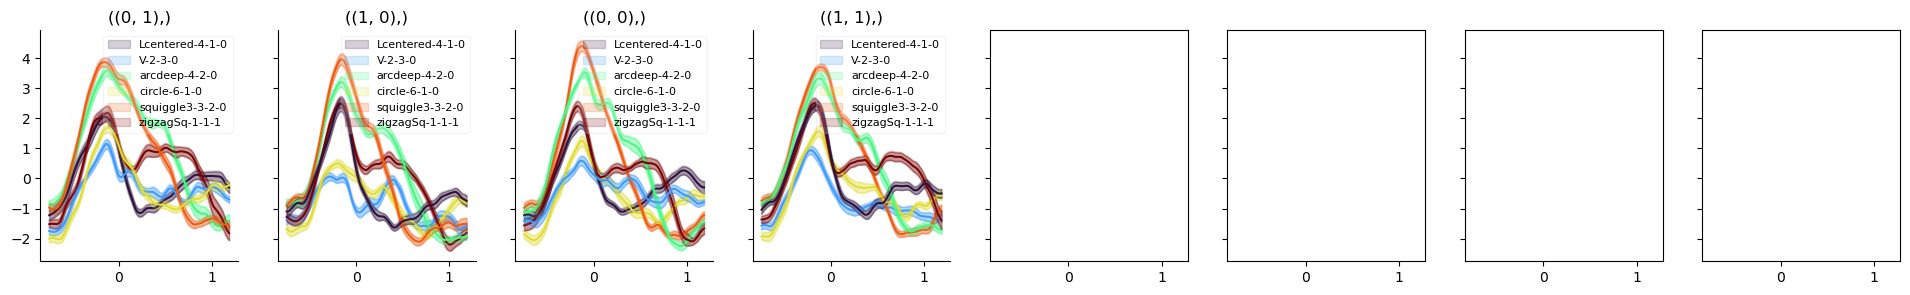

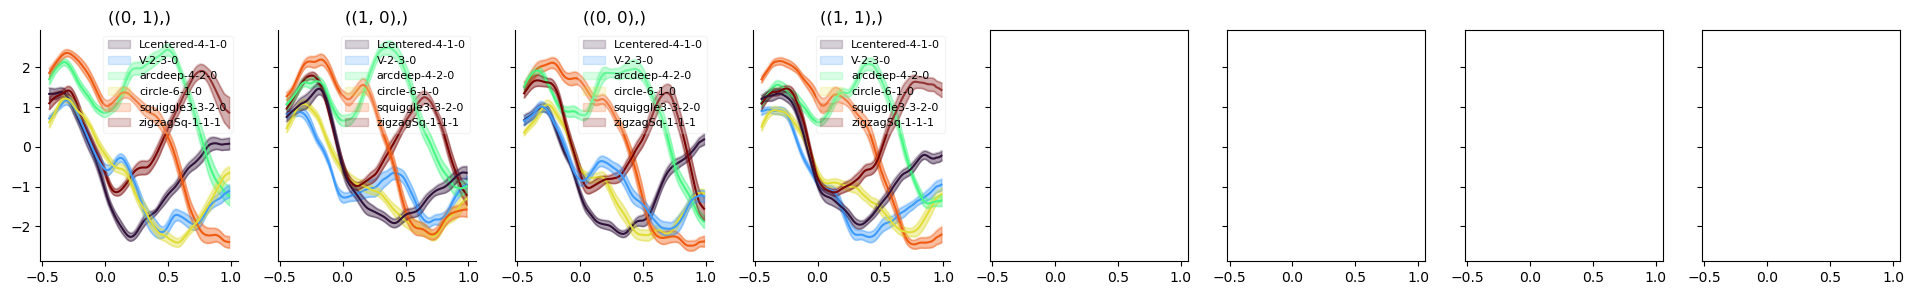

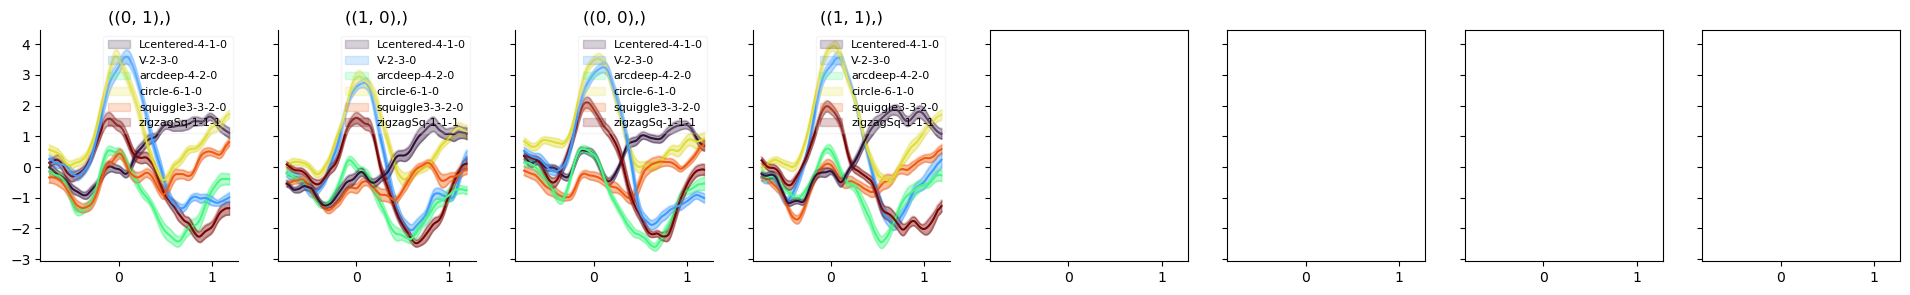

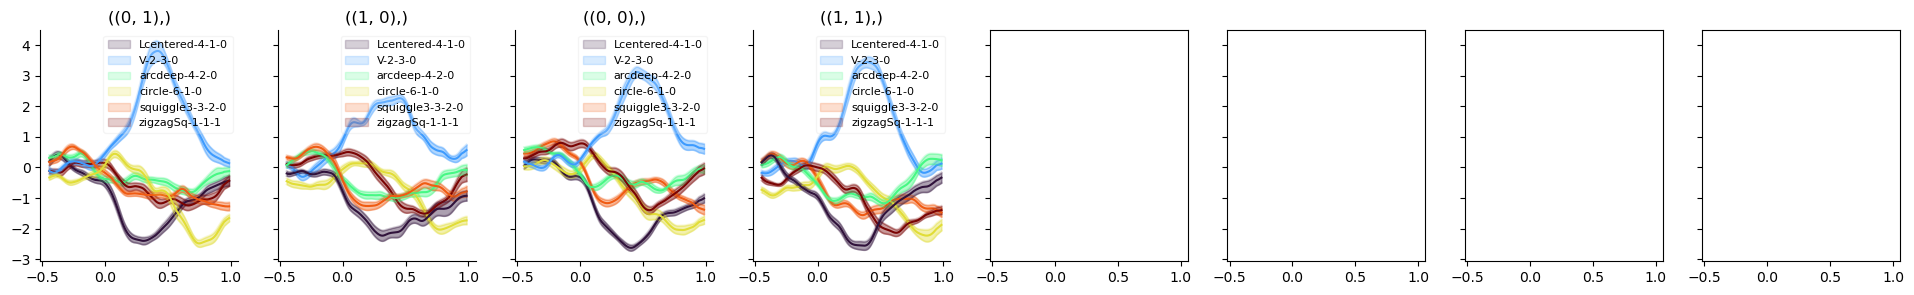

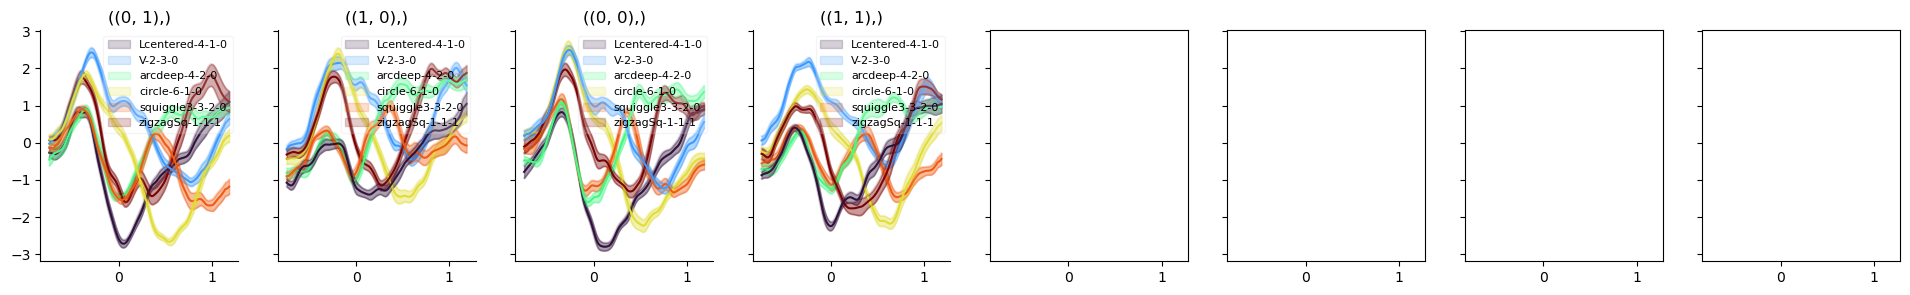

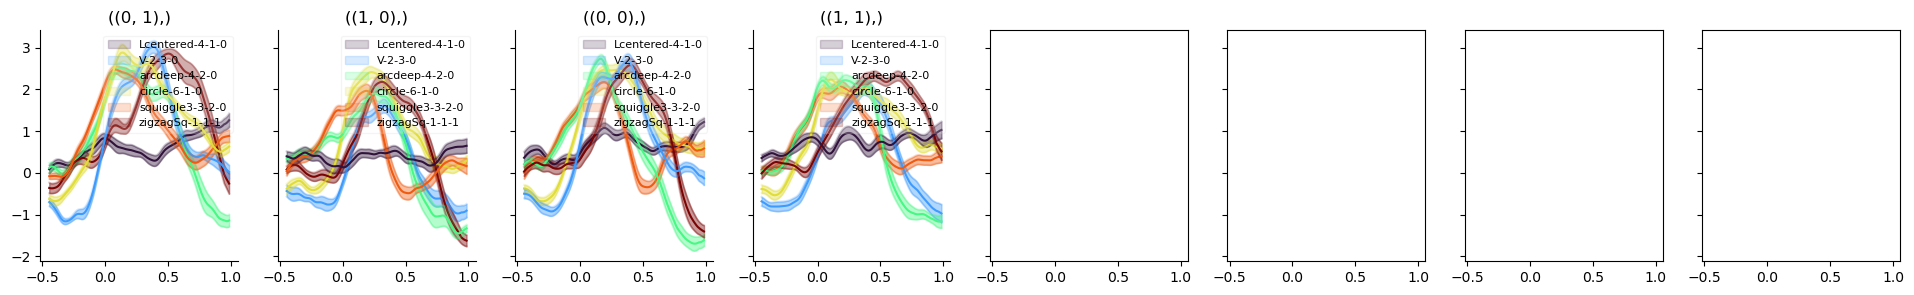

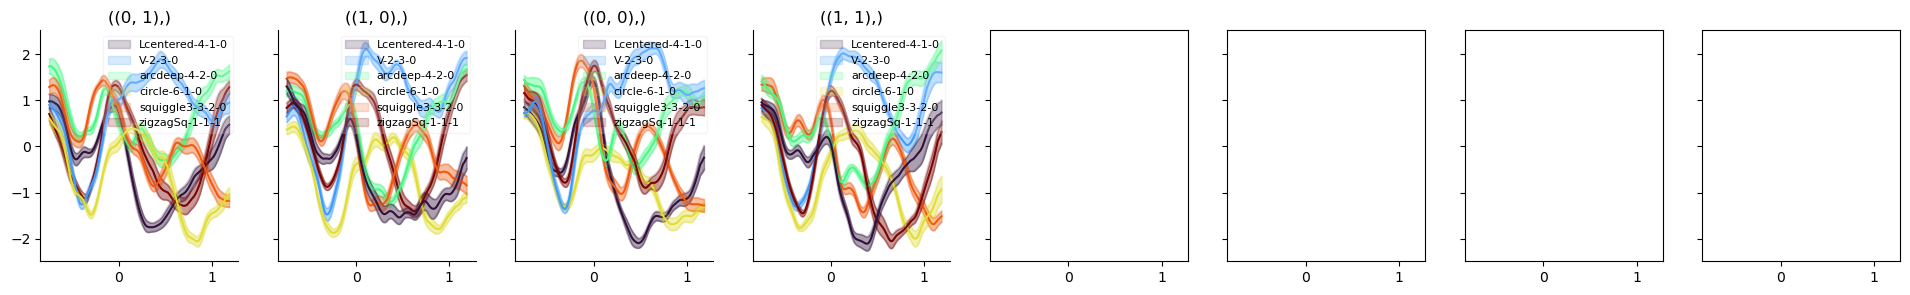

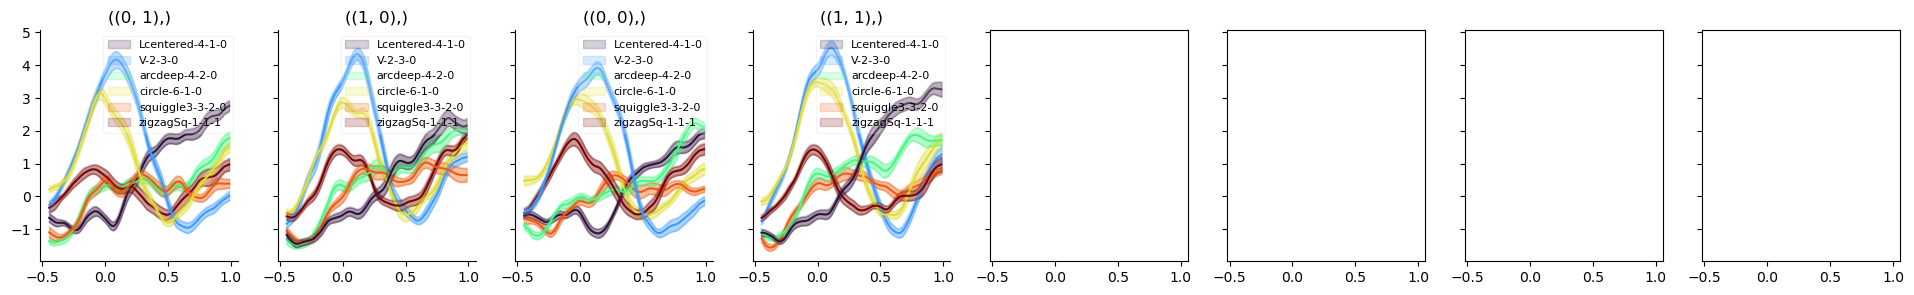

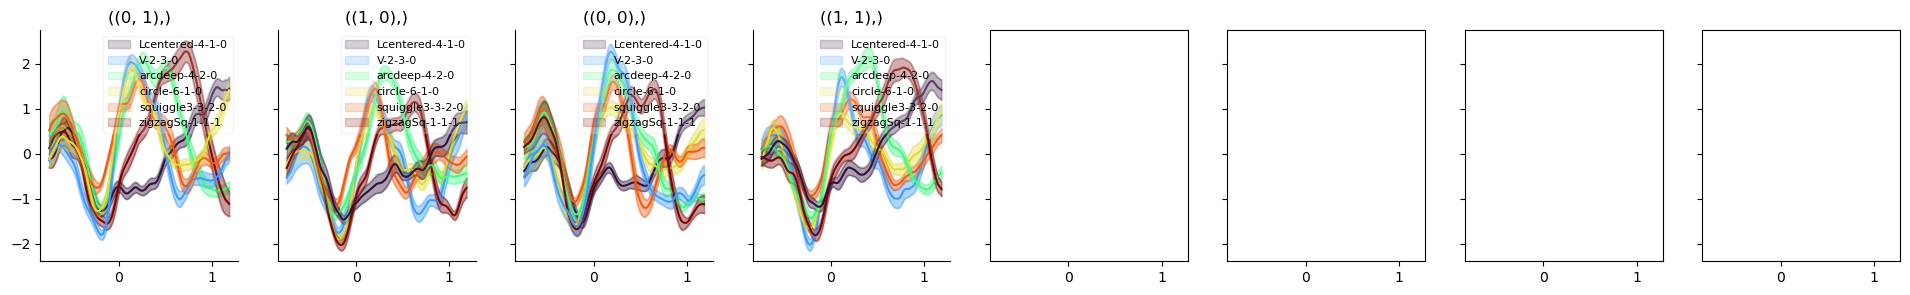

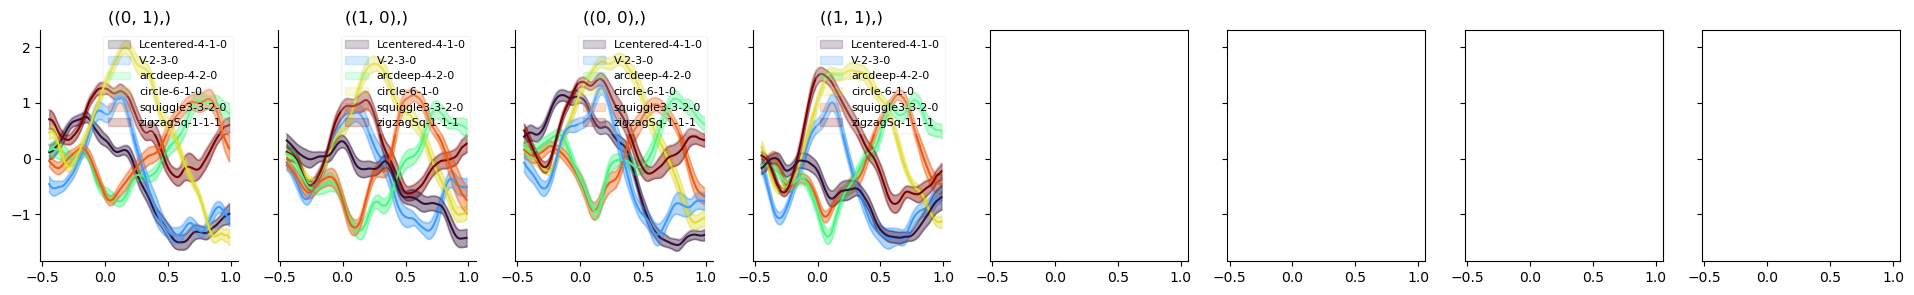

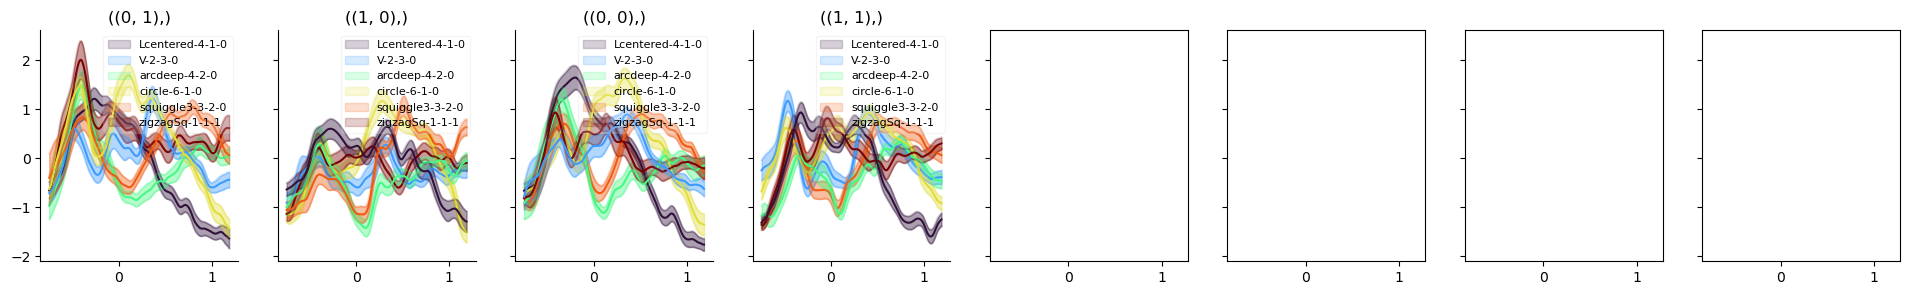

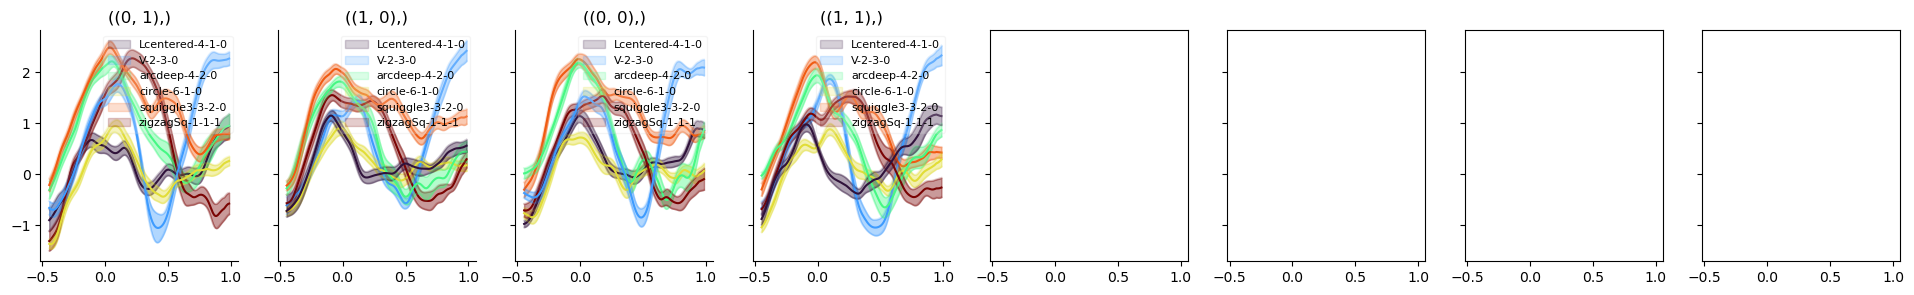

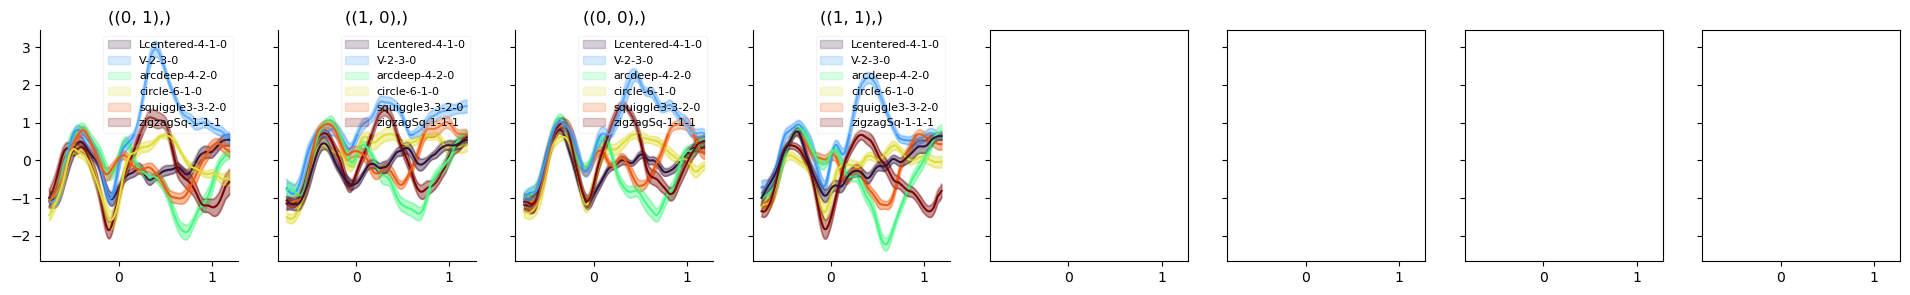

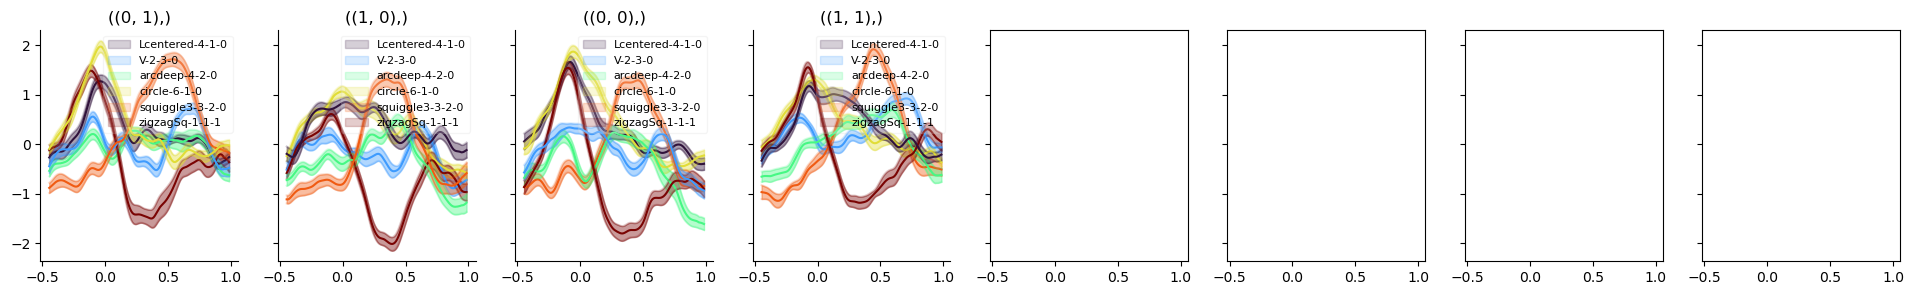

In [17]:
# Comapre the results
# (i) raw data, pick a random channel
chan = PA.Chans[0]
PA.plotwrapper_smoothed_fr_split_by_label_and_subplots(chan, var_pca, ["seqc_0_loc"])

for pc in range(8):
    # (ii) PCa on trials
    PAfinal1.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])
    # (iii) PCa on mean data
    PAfinal2.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])

##### Run a single PCA across all events

In [18]:
from neuralmonkey.classes.population_mult import dfpa_concat_pca_split_multbregion


In [ ]:

# Method 1 -- do PCA on trial-level data
sm_dur=0.1
sm_slide=0.01
npcs_keep_force=15
pca_method = "trials"
dfpa_concat_pca_split_multbregion(DFallpa, sm_dur=sm_dur, sm_slide=sm_slide,
                                      npcs_keep_force=npcs_keep_force,
                                      pca_method = pca_method)

In [19]:
# Method 2 -- take mean over trials (--> one datapt per level of pcamean_var) and then do pca
sm_dur=0.1
sm_slide=0.01
npcs_keep_force=15
pca_method = "trial_means"
pcamean_var = "seqc_0_shape"
pcamean_vars_grouping = None
pcamean_pca_twind = (0.1, 1.2) 
dfpa_concat_pca_split_multbregion(DFallpa, sm_dur=sm_dur, sm_slide=sm_slide,
                                      npcs_keep_force=npcs_keep_force,
                                      pca_method = pca_method, 
                                      pcamean_var = pcamean_var, 
                                      pcamean_vars_grouping = pcamean_vars_grouping,
                                      pcamean_pca_twind = pcamean_pca_twind)

Running ..  M1
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  PMv
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  PMd
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  dlPFC
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  vlPFC
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  FP
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  SMA
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Running ..  preSMA
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


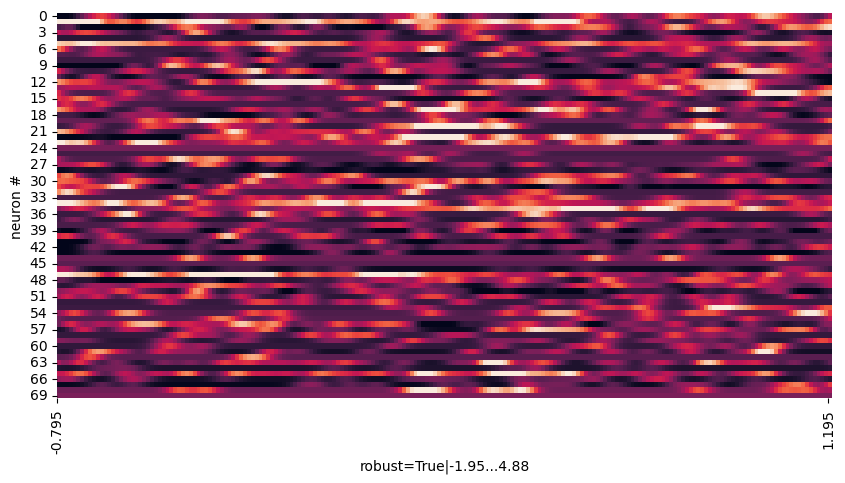

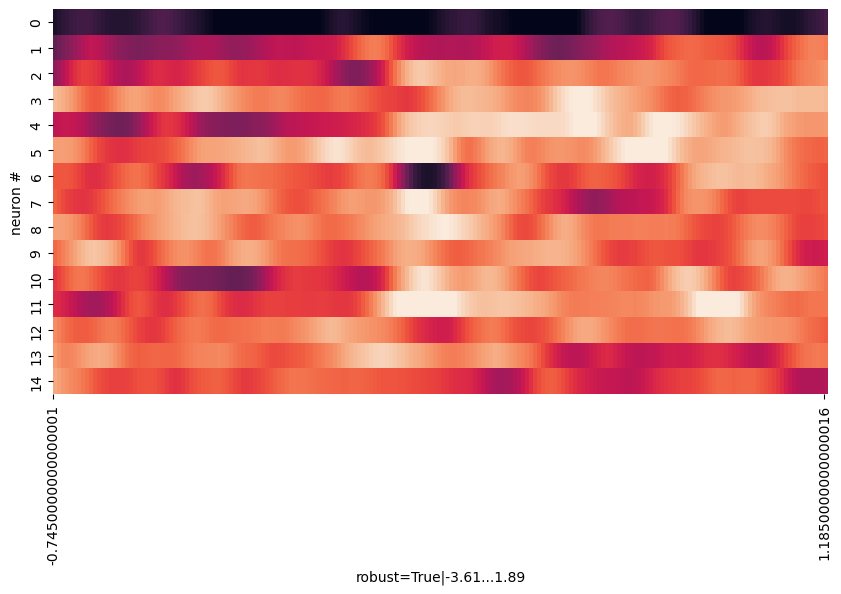

In [20]:
# Look at raw and PCA data for an example PA
ind =1
pa = DFallpa["pa"].values[ind]
pa_pca = DFallpa["pa_pca"].values[ind]

pa.plotNeurHeat(0)
pa_pca.plotNeurHeat(0)


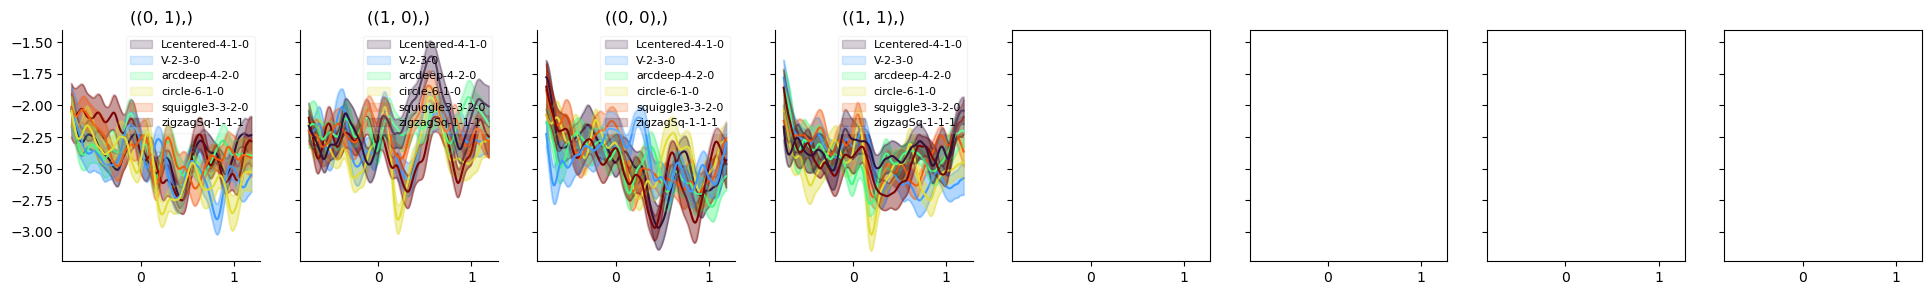

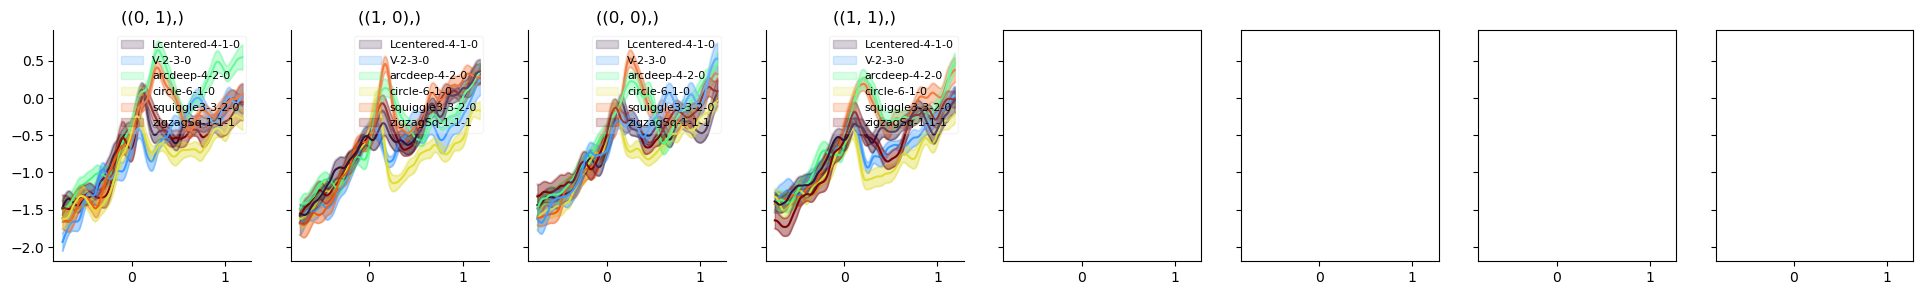

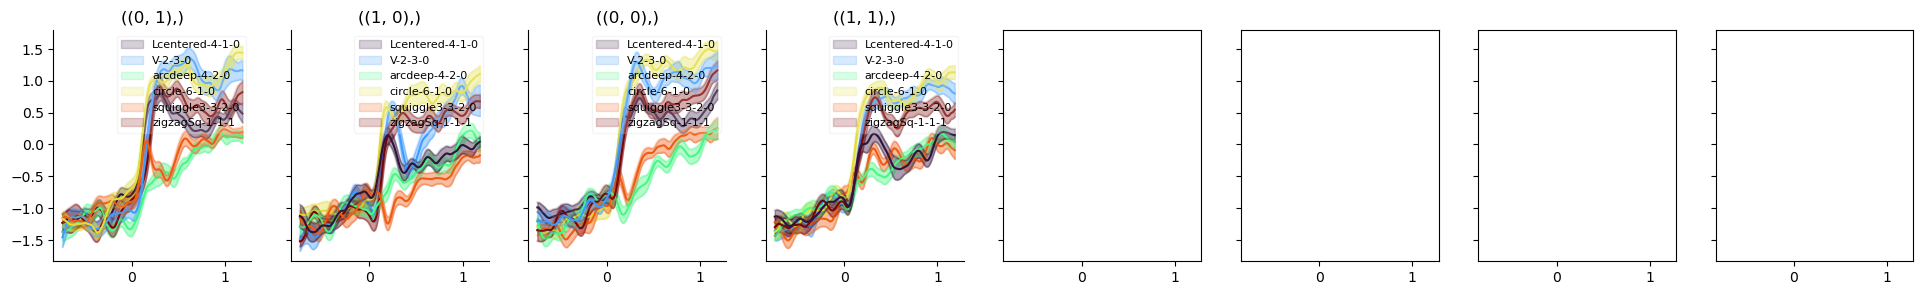

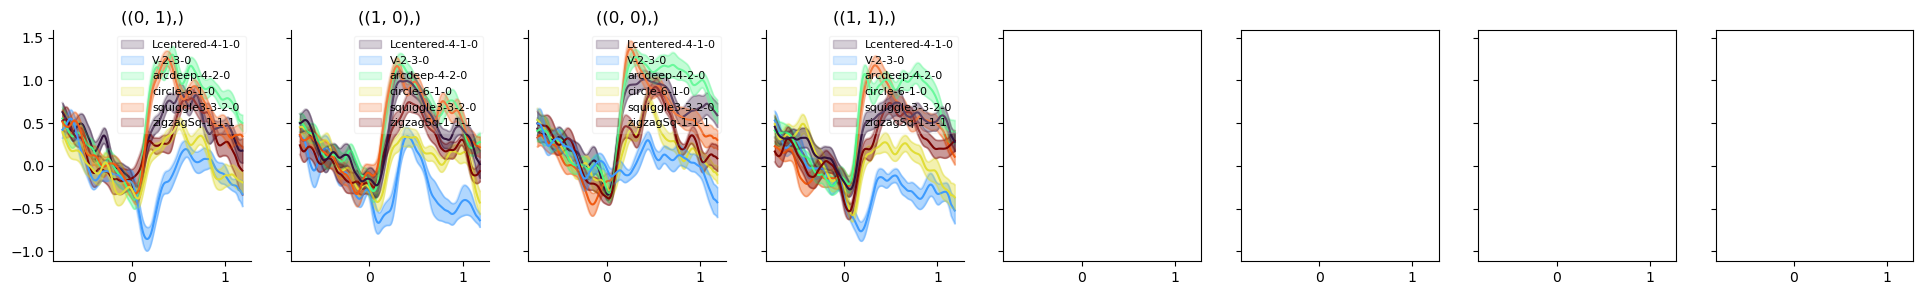

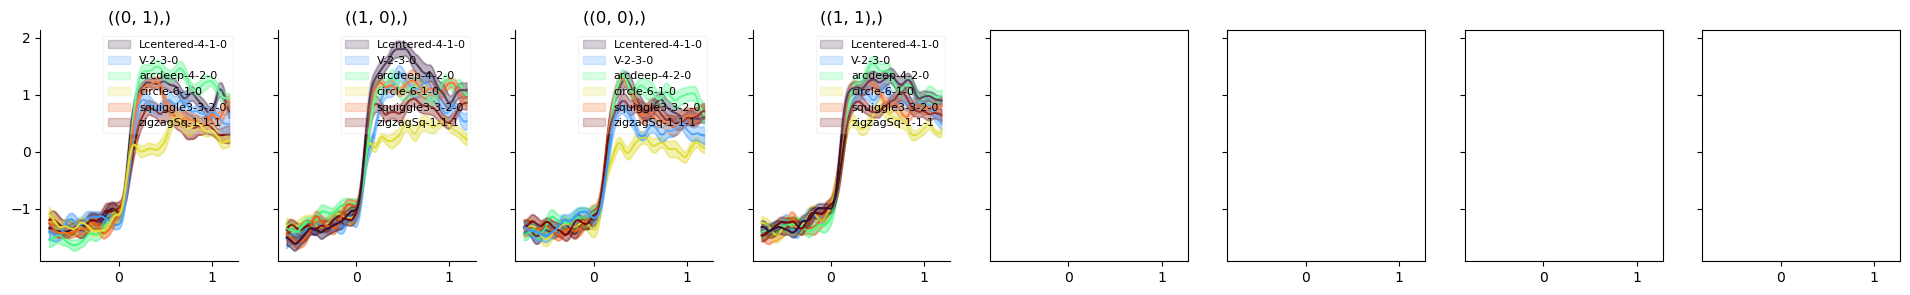

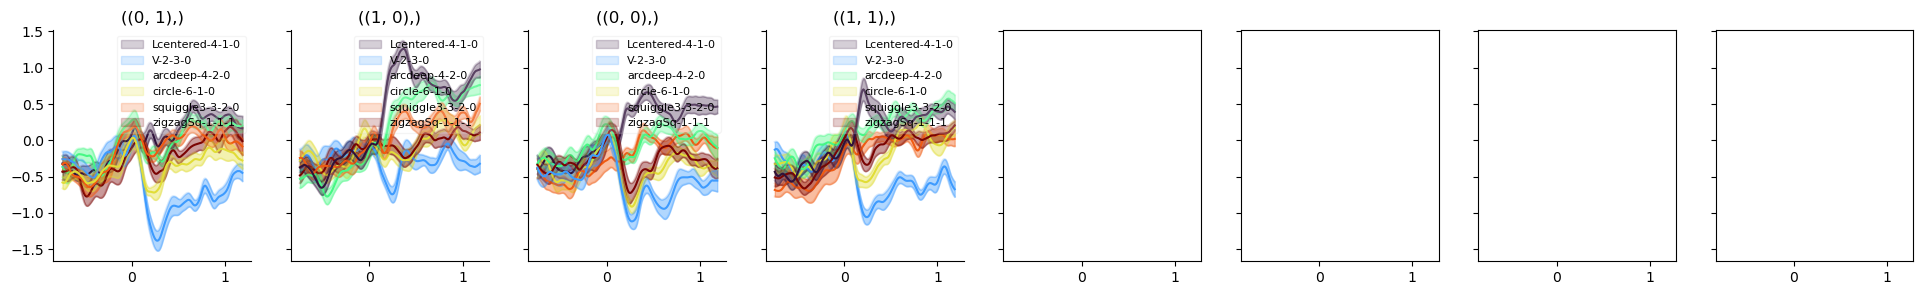

In [23]:
# Visaulize PC encoding of shape.
for pc in range(6):
    pa_pca.plotwrapper_smoothed_fr_split_by_label_and_subplots(pc, var_pca, ["seqc_0_loc"])


### [Optionally] get a single PA concatted across events (for each bregion)


In [ ]:
from neuralmonkey.classes.population_mult import dfpa_group_and_split
DFallpaConcat = dfpa_group_and_split(DFallpa, ["event"], concat_dim="times", pa_column="pa_pca")

### Plot strokes (behavior) on this trial, overlaid on the task image

In [ ]:
dflab = pa.Xlabels["trials"]

Tkbeh_stkbeh = dflab.iloc[trial]["Tkbeh_stkbeh"]
Tkbeh_stktask = dflab.iloc[trial]["Tkbeh_stktask"]

strokes_beh = [tk["Prim"].Stroke() for tk in Tkbeh_stkbeh.Tokens]
strokes_task = [tk["Prim"].Stroke() for tk in Tkbeh_stktask.Tokens]

fig, ax = plt.subplots()
from pythonlib.drawmodel.strokePlots import plotDatStrokesWrapper, plotDatStrokes

# # Plot the task strokes
# plotDatStrokes(strokes_task, ax, mark_stroke_onset=False, color="k")

# # Overlay each beh stroke
# plotDatStrokes(strokes_beh, ax, mark_stroke_onset=True, add_stroke_number=True)

# Plot the task strokes
plotDatStrokes(strokes_task, ax, clean_task=True)

# Overlay each beh stroke
plotDatStrokes(strokes_beh, ax, clean_ordered_ordinal=True)


##### PA has many helper functions to preprocess and plot the data. 

In [ ]:
# Pick a random channel
chan = pa.Chans[4]


In [ ]:
# Plot heatmap of data for a single trial
trial = pa.Trials[0]
pa.plotNeurHeat(trial)

In [ ]:
# Plot average acrtivit for each shape
fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan)


fig, ax = plt.subplots()
pa.plotwrapper_smoothed_fr_split_by_label("trials", "seqc_0_shape", ax, chan=chan, plot_indiv=True)


In [ ]:
# Example processing. Here this picks out just a smaller time winodw
print("Times, before slicing: ", pa.Times)

twind = [-0.35, -0.3] # window: to only keep times within this window
pa_slice = pa.slice_by_dim_values_wrapper("times", twind)

print("Times, after slicing:", pa_slice.Times)

In [ ]:
# 1. First slice to time winodw, then take mean over time, i.e. a single time average
twind = (0.1, 0.5)
pa_sliced = pa.slice_by_dim_values_wrapper("times", twind)
pa_mean = pa_sliced.agg_wrapper("times")

print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_sliced.Times, "... data shape: ", pa_sliced.X.shape)
print("-- mean:", pa_mean.Times, "... data shape: ", pa_mean.X.shape)


In [ ]:
# 2. binning time windows
binsize = 0.1
binslide = 0.02
pa_binned = pa.agg_by_time_windows_binned(binsize, binslide)
    
print("Compare and see that times are binned")
print("-- original:", pa.Times, "... data shape: ", pa.X.shape)
print("-- sliced:", pa_binned.Times, "... data shape: ", pa_binned.X.shape)


# Decoding shapes

This step takes in a representation of neural data and outputs a scalar score for how well you can decode "shape" from that data

Here, this example is using the raw data (dimensionality = number of channels). Could also use methods to reduce the dimensionality of this data, each time running through this decoding benchmark, to compare the different methods

### Make sure to normalize PA before running any modeling on it:

In [ ]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_fr_normalization
# fr_normalization_method = "each_time_bin"
fr_normalization_method = "across_time_bins"
plot_savedir = "/tmp"
dfallpa_preprocess_fr_normalization(DFallpa, fr_normalization_method, plot_savedir)

In [ ]:
# list_panorm = []
# for pa in DFallpa["pa"].tolist():
#     from neuralmonkey.analyses.state_space_good import popanal_preprocess_scalar_normalization
#     PAnorm, PAscal, PAscalagg, fig, axes, groupdict = popanal_preprocess_scalar_normalization(pa, None, DO_AGG_TRIALS=False)
#     list_panorm.append(PAnorm)
# DFallpa["pa"] = list_panorm
# if "pa_norm" in DFallpa.columns:
#     del DFallpa["pa_norm"]

### PREPROCESS - factorize all relevant labels FIRST here.


In [ ]:
from neuralmonkey.analyses.decode_good import preprocess_factorize_class_labels_ints
MAP_LABELS_TO_INT = preprocess_factorize_class_labels_ints(DFallpa)

### 1) Default: Time-resolved decoding

In [ ]:
# Simplest model, simply try to decode a single variable at each time bin, without caring about other possibly correlated variables.

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/decoding"
import os

In [ ]:
SAVEDIR = f"{SAVEDIR_ANALYSIS}/1_time_resolved"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

n_min_trials = 6

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_singlevar, decodewrapouterloop_categorical_timeresolved

# list_vars_decode = ["seqc_0_shape", "seqc_0_loc"]
# list_vars_decode = ["seqc_0_shape"]
list_vars_decode = ["seqc_0_shape"]
# list_vars_decode = ["seqc_2_shape"]
# list_vars_decode = ["shape_is_novel_all"]

# PARAMS
time_bin_size = 0.2 # binsize, to average over to get population vector of neural activity
slide = 0.2 # to slide the bin.
max_nsplits = 2 # n times to do cross-validation.

DFRES = decodewrapouterloop_categorical_timeresolved(DFallpa, list_vars_decode, SAVEDIR, time_bin_size, slide, n_min_trials,
                                                     max_nsplits=max_nsplits)


### 2) Cross-condition decoding

In [ ]:
# Ask whether a decoder for variable X, trained on each level of variable Y, can generalize to the other levels of variable Y.

In [ ]:
# For each time bin, decode shape genearlizing across location

SAVEDIR = f"{SAVEDIR_ANALYSIS}/2_cross_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

from neuralmonkey.analyses.decode_good import decodewrap_categorical_timeresolved_cross_condition, decodewrapouterloop_categorical_timeresolved_cross_condition

filtdict = None
separate_by_task_kind = True

# PARAMS

# # Context
# list_var_decode = [
#     "seqc_0_shape",
#     "shape-fixation",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
#     "is-fixated-on-seqc0shape",
# ]
# list_vars_conj = [
#     ["shape-macrosaccade-index", "seqc_0_loc_on_clust", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "loc-fixation", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "seqc_0_shape", "seqc_0_loc_on_clust", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "loc-fixation", "task_kind"],
#     ["shape-macrosaccade-index", "shape-fixation", "seqc_0_loc_on_clust", "task_kind"],
# ]
# Context
list_var_decode = [
    "seqc_0_shape",
    "seqc_0_loc",
]
list_vars_conj = [
    ["task_kind", "seqc_0_loc"],
    ["task_kind", "seqc_0_shape"],
]

time_bin_size = 0.2
slide = 0.2
subtract_mean_vars_conj = False
DFRES = decodewrapouterloop_categorical_timeresolved_cross_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                     SAVEDIR, time_bin_size=time_bin_size, slide=slide,
                                                     subtract_mean_vars_conj=subtract_mean_vars_conj,
                                                                     filtdict=filtdict,
                                                                     separate_by_task_kind=separate_by_task_kind)



### 2b) Within-condition decoding. Separate decoder for each level of other var (then take average over decoders). Useful to controlling for variables

In [ ]:
# Decode variable X by building and scoring separate decoders conditioned on each level of variable Y.

In [ ]:
from neuralmonkey.analyses.decode_good import decodewrapouterloop_categorical_timeresolved_within_condition

SAVEDIR = f"{SAVEDIR_ANALYSIS}/3_within_condition_decoding"
os.makedirs(SAVEDIR, exist_ok=True)
print(SAVEDIR)

# PARAMS
separate_by_task_kind = True

# RUns
max_nsplits = 2
time_bin_size = 0.2
slide = 0.2

# PARAMS
DFRES = decodewrapouterloop_categorical_timeresolved_within_condition(DFallpa, list_var_decode,
                                                     list_vars_conj,
                                                    SAVEDIR, time_bin_size=time_bin_size, slide=slide, filtdict=filtdict,
                                                                      separate_by_task_kind=separate_by_task_kind)


# Dim reduction and State space plots

In [ ]:
SAVEDIR_ANALYSIS = "/tmp/Diego_230630"

### Plot scalar values (time-mean within twindow)

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import matplotlib.pyplot as plt
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [-0.3, 0.0],
    [0.0, 0.3]
]
# METHOD = "umap"
METHOD = "umap"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]

LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "trials_x_chanstimes"

for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### SCALAR DATA
        # Extract data
        X, _, pathis, _, _  = pa.dataextract_state_space_decode_flex(twind_overall, tbin_dur, tbin_slide, reshape_method,
                                                           pca_reduce=True, pca_frac_var_keep=pca_frac_var_keep)
        dflab = pathis.Xlabels["trials"]
        
        if METHOD=="umap":
            # Embed data
            Xredu, _ = dimredgood_nonlinear_embed_data(X, METHOD=METHOD, n_components=2, umap_n_neighbors=umap_n_neighbors)
        elif METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False

        ##### Plot scalars
        savedir = f"{SAVEDIR_ANALYSIS}/scalar/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall])}-METHOD={METHOD}"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)

        for var_color, var_subplot in list_var_color_var_subplot:
            from neuralmonkey.analyses.state_space_good import trajgood_plot_colorby_splotby_scalar_WRAPPER
            trajgood_plot_colorby_splotby_scalar_WRAPPER(Xredu, dflab, var_color, savedir,
                                     vars_subplot=var_subplot, list_dims=LIST_DIMS, n_min_per_levo=n_min_per_levo)
        plt.close("all")

### Plot trajectories (within time window)

In [ ]:
from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby, trajgood_plot_colorby_splotby_scalar
from pythonlib.tools.plottools import savefig
from pythonlib.globals import PATH_ANALYSIS_OUTCOMES
import os
from neuralmonkey.analyses.state_space_good import dimredgood_nonlinear_embed_data
import matplotlib.pyplot as plt

### USER PARAMS
tbin_dur = 0.1
tbin_slide = 0.1
umap_n_neighbors = 45
pca_frac_var_keep = 0.8
n_min_per_levo= 5
list_twind_overall = [
    [0.2, 0.6]
]
# METHOD = "umap"
METHOD = "pca"
list_var_color_var_subplot = [
    ["seqc_0_shape", ("seqc_0_loc", "task_kind")],
]
LIST_DIMS = [(0,1)]

### HARD PARAMS
reshape_method = "chans_x_trials_x_times"


for i, row in DFallpa.iterrows():
    pa = row["pa"]
    br = row["bregion"]
    wl = row["which_level"]
    ev = row["event"]
    tw = row["twind"]

    for twind_overall in list_twind_overall:
        
        ###################### TRAJECTORY DATA
        from neuralmonkey.analyses.state_space_good import trajgood_construct_df_from_raw, trajgood_plot_colorby_splotby
        from neuralmonkey.classes.population_mult import extract_single_pa
        twind_overall_traj = [-0.2, 0.6]
        tbin_dur = 0.05
        X, PApca, PAslice, pca, _ = pa.dataextract_state_space_decode_flex(twind_overall_traj, tbin_dur=tbin_dur, pca_reduce=True)
        
        if METHOD=="pca":
            Xredu = X
        else:
            print(METHOD)
            assert False, "code it"
            
        savedir = f"{SAVEDIR_ANALYSIS}/trajectories/{br}-{ev}-twind={'_'.join([str(t) for t in twind_overall_traj])}-METHOD=pca"
        print(savedir)
        os.makedirs(savedir, exist_ok=True)
        
        for var_color, var_subplot in list_var_color_var_subplot:
            for dims in LIST_DIMS:
                # 1) Construct dataframe
                if isinstance(var_color, (list, tuple)):
                    grpvars = list(var_color) + list(var_subplot)
                else:
                    grpvars = [var_color] + list(var_subplot)
                    
                labels = PApca.Xlabels["trials"].loc[:, grpvars] 
                labelvars = grpvars
                df = trajgood_construct_df_from_raw(X, PApca.Times, labels, labelvars)
                
                # 2) Plot
                # dims = (0,1) # pairs of dimensions to plot
                times_to_mark = [0.] # you can mark specific times on the plot. here marks the 0. sec mark.
                times_to_mark_markers = ["d"] # mark with a diamond ("d")
                time_bin_size = 0.05 # to make plot easier to visaulize, you can bin in time.
                
                fig, axes = trajgood_plot_colorby_splotby(df, var_color, var_subplot, dims, "traj", mean_over_trials=True,
                                              times_to_mark = times_to_mark, times_to_mark_markers = times_to_mark_markers,
                                              time_bin_size=time_bin_size)        
                
                path = f"{savedir}/color={var_color}-sub={var_subplot}-dims={dims[0], dims[1]}.pdf"
                print("Saving ... ", path)
                savefig(fig, path)
                
                plt.close("all")
            

In [ ]:
sorted(dflab.columns.tolist())